In [1]:
import sklearn.datasets
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

importing data set from sklearn.datasets about breast-cancer

In [136]:
breast_cancer = sklearn.datasets.load_breast_cancer()

X IS CONTAINING NUMPY ARRAY CONTAINING FEATURES OF BREAST CANCER ANF Y CONTAINS THE OUTPUT WEATHER 
TISSUE CONTAINS THE CANCER !

In [135]:
x = breast_cancer.data
y = breast_cancer.target

MAKING A DATA FRAME CONTAING X 

In [4]:
data = pd.DataFrame(x,columns = breast_cancer.feature_names)


In [5]:
data['class'] = breast_cancer.target

In [138]:
x = data.drop('class',axis = 1)
x.insert(0,'X_0',1)
y = data['class'] 

SPLITING THE DATAFRAMES X AND Y IN TRAINING AND TEST DATAFRAME RANDOM_STATE = 1 ENSURES THAT DATA IS RANDOMIZED IN A MANNER THAT VARIANCE IS MIN AND STRATIFY ENSURES THAT DATA IS HAVING ALMOST SAME SONFIGURATION IN X AND TRAIN AND TEST SET

In [12]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.1,stratify = y, random_state = 1)

In [139]:
class Perceptron :
    
    def __init__(self):
        self.w = None
    
    def model(self,x):
        
        return 1 if np.dot(self.w,x) >= 0 else 0
    
    def predict(self,X):
        Y=[]
        
        for x in X:
           Y.append(self.model(x))
        
        return np.array(Y)
    
    def fit(self,X,Y,epochs,l_rate):
        self.w = np.ones(X.shape[1])
        accuracy = {}
        max_accuracy=0
        for i in range(epochs):            
            for x,y in zip(X,Y) :
                
                y_predicted = self.model(x)    
                error = y - y_predicted
                self.w = self.w + error * l_rate * x
                
            accuracy[i] = accuracy_score(self.predict(X),Y)

            if accuracy[i]>=max_accuracy:
                max_accuracy = accuracy[i]
                checkpoint_w = self.w
                
        plt.plot(accuracy.values())   
        plt.ylim([0,1])
        print(max_accuracy)
        plt.show()               

0.935546875


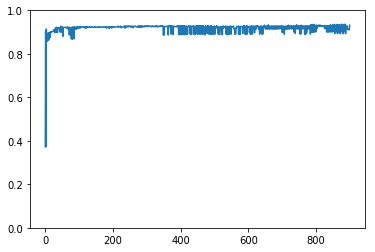

In [132]:
perceptron=Perceptron()

perceptron.fit(x_train.values,y_train.values,900,.35) 

In [133]:
y_pred = perceptron.predict(x_test.values)

In [134]:
print(accuracy_score(y_pred,y_test))

0.9473684210526315
